In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [5]:
(x_train, y_train), (x_test , y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
x_train
x_train.shape
x_train[0].shape

y_train
y_train.shape

(60000,)

In [15]:
x_test
x_test.shape

y_test
y_test.shape

(10000,)

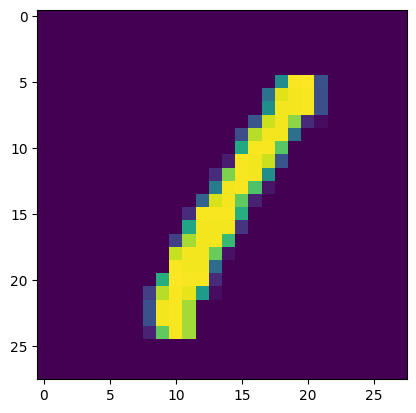

In [22]:
# print our pixel to image
import matplotlib.pyplot as plt
plt.imshow(x_train[3])

In [ ]:
# x_train has 28*28 pixel each having different value 0 to 255 , before make ann model we have to bring these values as
# as possible as we can , so simple divide all values by 255 to bring in between o to 1

In [23]:
x_train = x_train/255
x_test = x_test/255

In [26]:
# model formation
model = Sequential()
# flatten input from 28*28 to 784
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam')

In [29]:
model.fit(x_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.4912 - val_loss: 0.1520
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.1428 - val_loss: 0.1116
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0934 - val_loss: 0.1002
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0628 - val_loss: 0.0875
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0488 - val_loss: 0.1020
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0385 - val_loss: 0.0861
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0275 - val_loss: 0.0909
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0208 - val_loss: 0.0895
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0184 - val_loss: 0.0949
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0162 - val_loss: 0.0979


In [31]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
y_prob

array([[7.0486705e-10, 1.5629624e-10, 7.5858914e-08, ..., 9.9984121e-01,
        1.5141040e-06, 8.1013122e-06],
       [5.9030840e-13, 2.4356468e-06, 9.9999756e-01, ..., 5.2145628e-17,
        6.2036083e-09, 4.1258162e-16],
       [3.6179561e-08, 9.9972713e-01, 1.7422626e-05, ..., 1.2618705e-04,
        8.9708672e-05, 1.6978194e-07],
       ...,
       [1.7006590e-17, 1.9138139e-13, 2.0369624e-15, ..., 6.9316961e-09,
        2.2808518e-10, 3.8609741e-07],
       [2.1500178e-13, 1.6679703e-14, 4.6761827e-17, ..., 3.6923672e-11,
        1.0828207e-06, 2.6451017e-13],
       [9.7485374e-11, 1.8031380e-13, 7.8649565e-10, ..., 4.4053798e-15,
        1.4400026e-12, 2.5278565e-16]], dtype=float32)

In [33]:
y_pred = y_prob.argmax(axis = 1 )

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test, y_pred)

0.9781

In [ ]:
# improve model performance

In [37]:
# model formation
model1 = Sequential()
# flatten input from 28*28 to 784
model1.add(Flatten(input_shape = (28,28)))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(10, activation = 'softmax'))

In [38]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [40]:
history = model1.fit(x_train, y_train, epochs = 15, validation_split = 0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8521 - loss: 0.5014 - val_accuracy: 0.9571 - val_loss: 0.1447
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9645 - loss: 0.1205 - val_accuracy: 0.9667 - val_loss: 0.1109
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9753 - loss: 0.0846 - val_accuracy: 0.9712 - val_loss: 0.0951
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9832 - loss: 0.0566 - val_accuracy: 0.9708 - val_loss: 0.1002
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9860 - loss: 0.0440 - val_accuracy: 0.9706 - val_loss: 0.1046
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9879 - loss: 0.0352 - val_accuracy: 0.9737 - val_loss: 0.1004
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9899 - loss: 0.0286 - val_accuracy: 0.9748 - val_loss: 0.0975
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9918 - loss: 0.02

In [41]:
y_prob1 = model1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [42]:
y_prob1

array([[4.18732133e-13, 7.15374288e-12, 4.59431833e-11, ...,
        9.99999940e-01, 2.56143839e-11, 3.28288980e-12],
       [5.58742954e-16, 1.47706317e-07, 9.99999821e-01, ...,
        9.05574613e-15, 4.86671970e-15, 1.36096334e-23],
       [1.11849321e-08, 9.99994576e-01, 1.19236773e-07, ...,
        4.87008765e-06, 2.87028286e-07, 4.17487239e-10],
       ...,
       [2.05191501e-21, 4.88585137e-19, 3.57250791e-26, ...,
        6.78349512e-17, 2.17565156e-23, 2.52517759e-15],
       [1.35514841e-19, 1.85208970e-21, 1.14357876e-23, ...,
        3.68706564e-14, 3.96195542e-11, 8.84801600e-18],
       [3.89794056e-12, 4.33833467e-16, 3.68513915e-14, ...,
        6.71181412e-23, 8.42726645e-17, 5.88783808e-21]], dtype=float32)

In [45]:
y_pred1 = y_prob1.argmax(axis = 1 )

In [46]:
accuracy_score(y_test, y_pred1)

0.9773

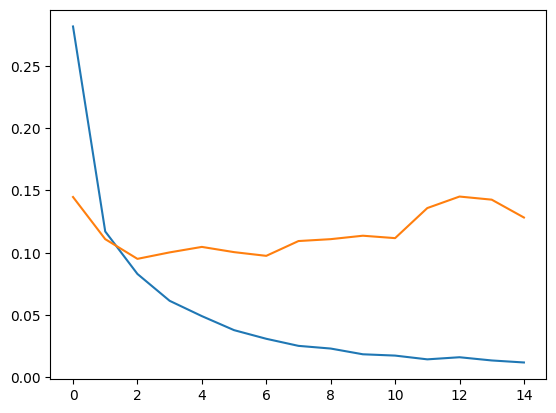

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

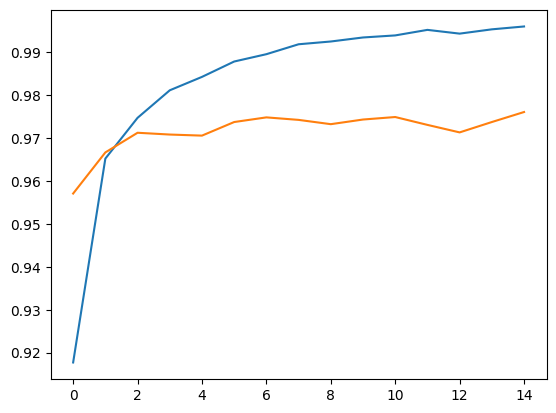

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

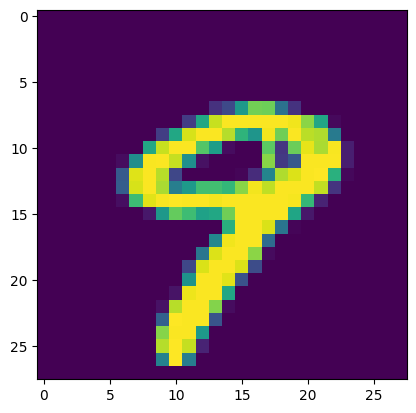

In [54]:
# lets try it
plt.imshow(x_test[9])


In [55]:
model.predict(x_test[9].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([9])